# 課題　ボストン住宅価格

## １　今回のゴール

### 決定木を用いて住宅価格を予測する。

## ２　学習課題

### 基本的な機械学習の流れと学習曲線及びグリッドサーチについて理解を深める。

## ３　必要なライブラリーをimport

In [1]:
import numpy as np
import random as rnd
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score, make_scorer
from sklearn.datasets import load_boston

## ４　データ取得

In [2]:
boston = load_boston()

## ５　取得したデータをDataFrameにする

In [3]:
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=pd.DataFrame(boston.target,columns=['MEDV'])

## ６、７、８　データ探索、一変数の可視化

### データベースの各レコードは、ボストン・マサチューセッツ州の住宅に関する米国国勢調査サービスによって収集された情報です。データは元々は、ハリソン、D.とルビンフェルド、DLの`Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978年に公表された。属性は以下のように定義されている（UCI Machine Learning Repository1から取得）：CRIM：町ごとの一人当たり犯罪発生率、ZN： 25,000平方フィート以上の住居区画の占める割合、 INDUS：町ごとの非小売業が占める面積の割合、 CHAS：チャールズ川を基点とする変数（河川周辺の場合は1、そうでない場合は0）、 NOX：窒素酸化物濃度、RM：住居の平均部屋数、 AGE：1940年以前に建設された物件の割合、 DIS：５つのボストン雇用センターからの距離、 RAD：環状ハイウェイへのアクセス可能性の指標、Tax：＄10,000当たりの不動産税率の総計、PTRATIO：町毎の子供と教師の比率、B：町毎の黒人 (Bk) の比率を次の式で表したもの、1000(Bk – 0.63)^2、LSTAT：給与の低い職業に従事する人口の割合 (%)、MEDV：所有者が占有している家屋の＄1,000単位の中央値

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
pd.set_option("display.max_rows",506)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
y.tail()

,MEDV
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [12]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [13]:
y.isnull().sum()

MEDV    0
dtype: int64

In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
MEDV    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [15]:
pd.set_option("display.max_rows",506)
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


## ９　describeメソッドを用いることで把握できたこと

### 前処理に関して、欠損値や異常値がないかどうかに留意しなければいけない。欠損値は発生していないと認識できる。平均値、最大値、最小値等を探索し、回帰分析・分類分析・決定木等の機械学習の手法を検討出来る。データ探索により、最大値と最小値の幅の小さなもの等のそれ程参考にならないと考えられるもの、定性的に見て住宅価格と相関関係が薄いと思われるもの等は、特徴選択から外して考えることができる。

## １０　二変数の可視化

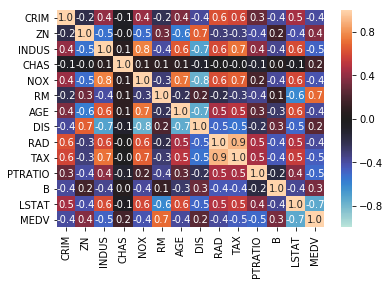

In [16]:
# データ間の相関係数を求める
data_Xy=pd.concat([X,y],axis=1)
corr_mat = data_Xy.corr(method="pearson") 
# ヒートマップで可視化
sns.heatmap(corr_mat, vmax=1, vmin=-1, center=0, annot=True, fmt=".1f")

### 相関とは相互に影響を与える関係があることを言い、相関係数等でその関係性（相互の影響度合い）を表すことができる。MEDVにもっとも相関があると出力された変数は、RM、LSTAT、ZNの３つである。これらの３つの説明変数と目的変数であるMEDVとの相関関係を回帰分析・決定木分析等で分析出来る。ここでは、回帰分析手法を用いて分析する。

### ＜単回帰分析＞

In [17]:
# ’LSTAT'を説明変数として単回帰分析を行う。
lin_1d = LinearRegression()
x = X['LSTAT']
lin_1d.fit(x[:,None],y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

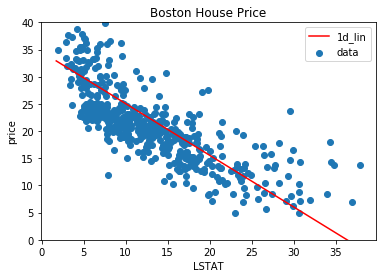

In [18]:
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(0,40)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

### ＜多項式（２次関数）単回帰分析＞

[]

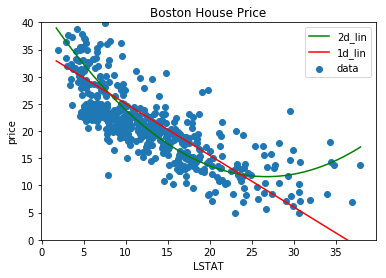

In [19]:
# ’LSTAT'を説明変数として多項式（２次関数）単回帰分析を行う。
degree_2=PolynomialFeatures(degree=2)
x_2=degree_2.fit_transform(x[:,None])
lin_2d = LinearRegression()
lin_2d.fit(x_2,y)
n = np.linspace(np.min(x),np.max(x), 1000)
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(0,40)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

### ＜多項式（３次関数）単回帰分析＞

[]

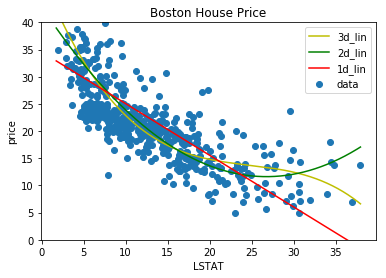

In [20]:
# ’LSTAT'を説明変数として多項式（３次関数）単回帰分析を行う。
degree_3=PolynomialFeatures(degree=3)
x_3=degree_3.fit_transform(x[:,None])
lin_3d = LinearRegression()
lin_3d.fit(x_3,y)

n = np.linspace(np.min(x),np.max(x), 1000)
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,np.newaxis]))
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_3d_fit,'y',label='3d_lin')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(0,40)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

### ＜多項式（4次関数）単回帰分析＞

[]

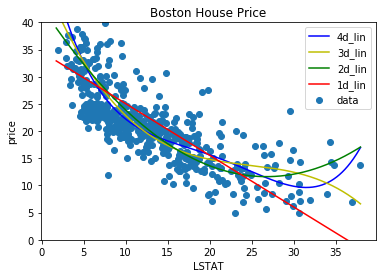

In [21]:
# ’LSTAT'を説明変数として多項式（4次関数）単回帰分析を行う。
degree_4=PolynomialFeatures(degree=4)
x_4=degree_4.fit_transform(x[:,None])
lin_4d = LinearRegression()
lin_4d.fit(x_4,y)

n = np.linspace(np.min(x),np.max(x), 1000)
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,np.newaxis]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,np.newaxis]))
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_4d_fit,'b',label='4d_lin')
plt.plot(n,y_3d_fit,'y',label='3d_lin')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(0,40)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

### ＜２乗和誤差の計算＞

In [22]:
# １次関数の２乗和誤差
mean_squared_error(y,lin_1d.predict(x[:,None]))

38.48296722989414

In [23]:
# ２次関数の２乗和誤差
mean_squared_error(y,lin_2d.predict(x_2))

30.330520075853716

In [24]:
# 3次関数の２乗和誤差
mean_squared_error(y,lin_3d.predict(x_3))

28.884350319213173

In [25]:
# 4次関数の２乗和誤差
mean_squared_error(y,lin_4d.predict(x_4))

27.604131650489478

### 上記の計算の結果、4次関数の計算の誤差（データとのズレ）が最も少なくなっていることが分かる。相関の注意点としては、散布図を見た上で、外れ値の状況を確認すること、分布形が線形か非線形かを確認することが挙げられる。これらの対処方法としては、外れ値の除去若しくは順位相関係数を使っての方法等がある。また、相関係数を見る時には、その値だけでなく信頼区間なども参照しながら、慎重に解釈をすることが必要となる。ちなみに，相関係数を二乗すると，片方の変数の分散がもう１つの分散を説明する割合を示す指標になる（分散説明率）。これも相関係数を解釈する際の1つの有力な情報になる。

### ＜相関係数の高かったRM,LSTAT,ZNについてのプロット図＞

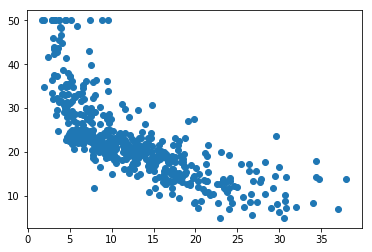

In [26]:
# ＜LSTAT＞
x=X['LSTAT'].values
plt.scatter(x,y)

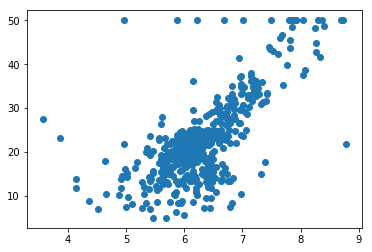

In [27]:
# ＜RM＞
x_RM=X['RM'].values
plt.scatter(x_RM,y)

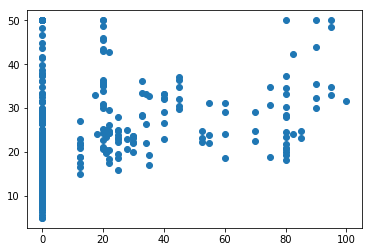

In [28]:
# ＜ZN＞
x_ZN=X['ZN'].values
plt.scatter(x_ZN,y)

### 上記のプロット図を見る限り、LSTAT及びRMは相関関係があると認識できるが、ZNについては相関関係があるようには見えないことが分かる。

## １１　前処理（省略）

## １２　データセット分割

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [30]:
X_train.shape

(379, 13)

In [31]:
y_train.shape

(379, 1)

## １３　学習、１４　決定係数

In [32]:
# 深さが１

tree = DecisionTreeRegressor(max_depth = 1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
print('Train score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test score: {:.3f}'.format(tree.score(X_test, y_test)))

Train score: 0.450
Test score: 0.412


In [34]:
# 深さが２

tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
print('Train score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test score: {:.3f}'.format(tree.score(X_test, y_test)))

Train score: 0.674
Test score: 0.738


In [36]:
# 深さが３

tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
print('Train score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test score: {:.3f}'.format(tree.score(X_test, y_test)))

Train score: 0.795
Test score: 0.822


## １５、１６　深さの選択、学習曲線

In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

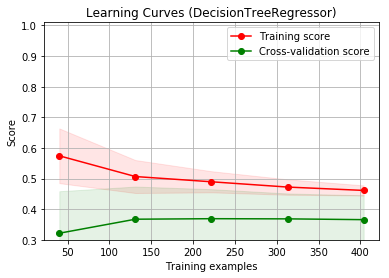

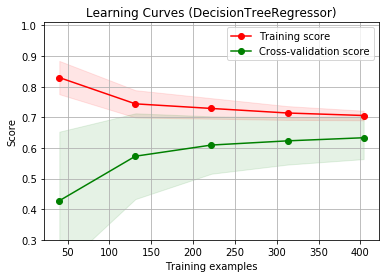

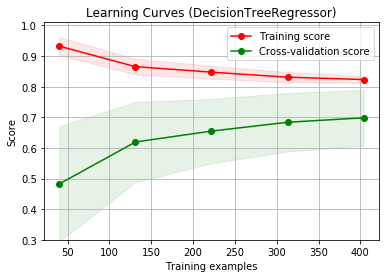

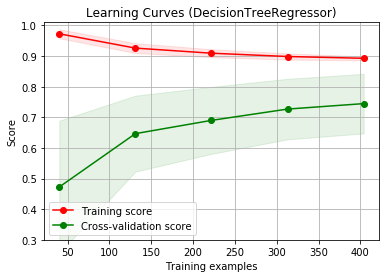

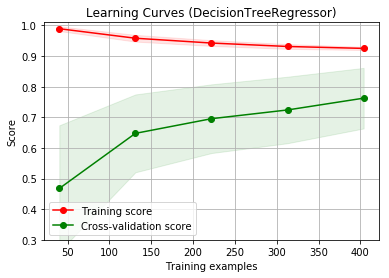

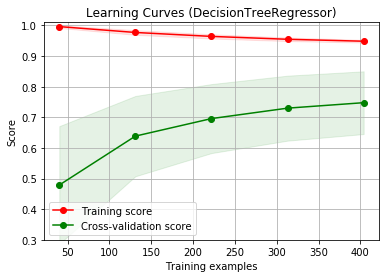

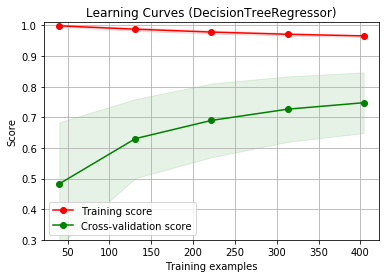

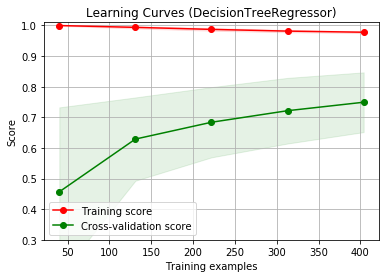

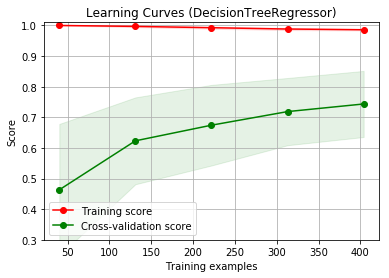

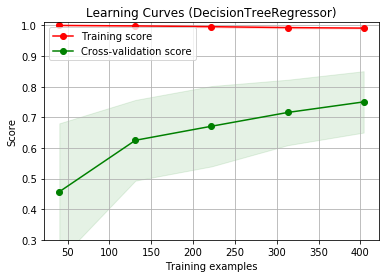

In [39]:
title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator,title,X,y,ylim=(0.3, 1.01), cv=cv, n_jobs=4)

## １７　学習曲線についての記述

### Variance及びBiasは、トレードオフの関係にあり、High varianceの状態が過学習（overfitting）で、High biasの状態が未学習（underfitting）である。横軸をデータサイズとした時に、過学習（High Variance (+ Low bias)）の時は、訓練データに対する精度がとても高く、テストデータに対する精度は低くなる。それに対して、未学習(High bias (+Low variance))の時は、データサイズを増やしても訓練データとテストデータに対する精度が共に低い状況である。最も結果が良いと思われた深さは、５のケースである。その理由は、Cross-validation scoreが高く、かつ、Training scoreとも近くて収束しているように描画されているからである。このケースにおいて、データ数を増やして行く場合には、Cross-validation scoreは若干上昇すると考えられるが、それ程大きな上昇率を示すとは考えずらい。

## １８　グリッドサーチ

In [40]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


## １９　グリッドサーチについての記述

### グリッドサーチとは、モデルの精度を向上させるために用いられる手法であり、全てのパラメータの組み合わせを試してみる方法のことである。イメージとしてはループさせて、パラメータの組み合わせを全て試し、最も評価精度の良いものを探索する方法で、パラメータを変更することで予測精度は飛躍的に変わることになる。グリッドサーチと同じようにハイパーパラメーターを探索する手法としては、ランダムリサーチという手法があり、この手法はディープラーニングなどハイパーパラメータが非常に多い場合、グリッドサーチのための組み合わせは、時間的負担等が非常に大きくなってしまう。そうした場合は、しらみつぶしにではなく、組み合わせをランダムに選んで試すという手法である。また、訓練データを2つに分け、一つはこれまでと同じようにある次数と正則化パラメータの元での係数を求めるための普通の訓練データとして使い、もう一方のデータの組については、そのデータを使って汎化能力をはかり、一番良い性能を示した次数と正則化パラメータの組を採用するためのデータセットとして使う方法もある。このデータセットは通常検証データなどといわれるが、さらに最終的な性能の評価のためにはテストデータが必要になる。すなわち、訓練データ、検証データ、テストデータの3つに分ける必要がある。このように、データ全体を3つに分ける手法のことをホールドアウト法という。

## ２０　グリッドサーチを使いこなす

In [41]:
# kfoldが３回

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


In [42]:
# kfoldが１０回

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 6}


In [43]:
# 平均二乗和に変更、kfoldが３回

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(mean_squared_error)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 1}


In [44]:
# 平均二乗和に変更、kfoldが１０回

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(mean_squared_error)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 1}


## ２１　テスト

In [45]:
# 深さが5

tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
print('Train score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test score: {:.3f}'.format(tree.score(X_test, y_test)))

Train score: 0.920
Test score: 0.876
